[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1XmGPHKXeaYK4lgsObINRFtwVF53gBpnt?usp=sharing)

## Dimensionality Reduction Tchniques

Dimensionality reduction is a crucial step in data analysis, especially when dealing with high-dimensional datasets. Here's we are performing a step-by-step guide that covers various dimensionality reduction techniques, including their applications, limitations, and hyperparameter tuning.

## Setting Up the Environment

In [ ]:
!pip install umap-learn

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding
from sklearn import datasets
import umap

## Load Dataset
Here we are using sklearn Iris dataset

In [ ]:
# Load Iris dataset
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

# Convert to DataFrame for easier viewing
iris_df = pd.DataFrame(X_iris, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first few rows of the dataset
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PCA on Iris Dataset
PCA is a technique that reduces the dimensionality of the data by transforming it into a new set of variables, the principal components, which are orthogonal to each other and capture the maximum variance in the data.

**PCA (Principal Component Analysis)**
**Works Well:** PCA is effective for linear dimensionality reduction and works best when the dataset has linear correlations. It's ideal for datasets where the principal components can capture a large proportion of the variance.
**Limitations:** PCA is not suitable for datasets with complex, non-linear relationships. It can also be less effective if the dataset has a lot of noise or outliers.

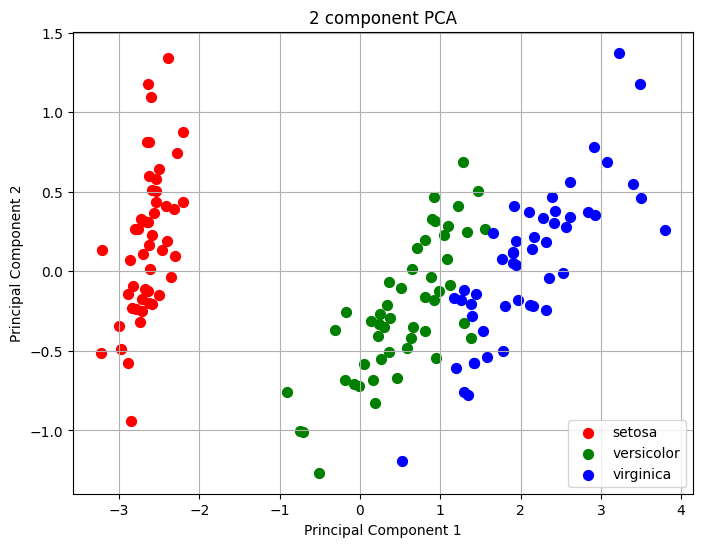

In [ ]:
# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_iris)

# Converting to DataFrame for easier plotting
pca_df = pd.DataFrame(data = X_pca, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['Species'] = y_iris

# Plotting the results
plt.figure(figsize=(8,6))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 component PCA')

colors = ['r', 'g', 'b']
for i, color in enumerate(colors):
    indicesToKeep = pca_df['Species'] == i
    plt.scatter(pca_df.loc[indicesToKeep, 'Principal Component 1'],
                pca_df.loc[indicesToKeep, 'Principal Component 2'],
                c=color,
                s=50)
plt.legend(iris.target_names)
plt.grid()
plt.show()

The PCA plot for the Iris dataset is now displayed. It shows the data projected onto the first two principal components, with each color representing a different species (setosa, versicolor, virginica).

The plot illustrates how PCA reduces the dimensionality of the data while attempting to preserve as much variance as possible.

**Performance on Iris Dataset:**
PCA performed well with the Iris dataset. It effectively captured the variance and separated the different species, especially Setosa, which was distinctly separated from Versicolor and Virginica. This is expected as PCA is good at capturing linear relationships and is a robust method for such datasets.

## SVD on Iris Dataset
Singular Value Decomposition (SVD) is a matrix factorization technique that decomposes a matrix into three other matrices.

**Works Well:** Similar to PCA, SVD works well with linearly correlated data and is useful in situations like topic modeling in text data or image processing.
**Limitations:** SVD struggles with non-linear data and is sensitive to scaling; hence, data normalization is often required.

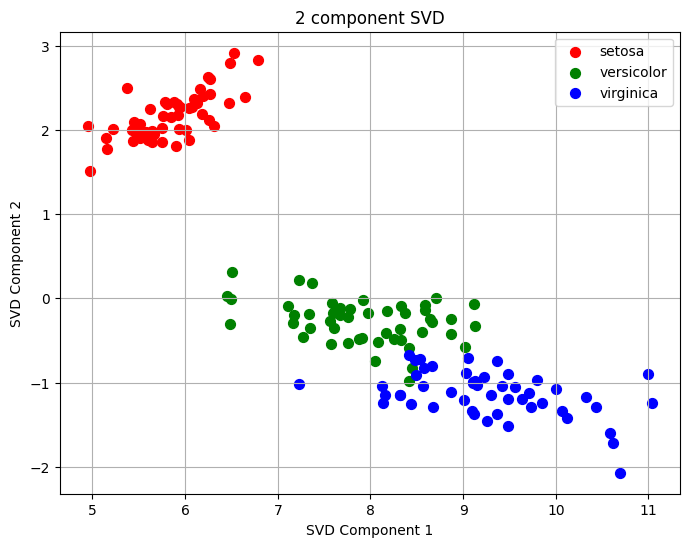

In [ ]:
# Applying SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X_iris)

# Converting to DataFrame for easier plotting
svd_df = pd.DataFrame(data = X_svd, columns = ['SVD Component 1', 'SVD Component 2'])
svd_df['Species'] = y_iris

# Plotting the results
plt.figure(figsize=(8,6))
plt.xlabel('SVD Component 1')
plt.ylabel('SVD Component 2')
plt.title('2 component SVD')

for i, color in enumerate(['r', 'g', 'b']):
    indicesToKeep = svd_df['Species'] == i
    plt.scatter(svd_df.loc[indicesToKeep, 'SVD Component 1'],
                svd_df.loc[indicesToKeep, 'SVD Component 2'],
                c = color,
                s = 50)
plt.legend(iris.target_names)
plt.grid()
plt.show()


**Performance on Iris Dataset:**
SVD's performance was similar to PCA on the Iris dataset. It effectively reduced the dimensionality while retaining the structure that differentiates the species. SVD and PCA often yield similar results on datasets where linear dimensionality reduction is appropriate.

## MDS, Isomap, and LLE on Iris Dataset

**MDS (Multidimensional Scaling)**
MDS is a technique used for analyzing similarity or dissimilarity data. It attempts to model similarity or dissimilarity data as distances in a geometric space.
**Works Well:** MDS is effective for visualizing similarities or dissimilarities in data. It is useful in fields like psychometrics and marketing research.
**Limitations:** MDS can be computationally expensive for large datasets and may not perform well if the dissimilarities are not well-defined.

**Isomap**
Isomap is a non-linear dimensionality reduction method based on the geometric distances between the points.
**Works Well:** Ideal for non-linear dimensionality reduction, especially if the data lies on a curved manifold. It’s effective in cases like face recognition, where linear methods like PCA fail.
**Limitations:** It can be computationally intensive and may produce poor embeddings if the neighborhood size isn't chosen correctly.

**LLE (Locally Linear Embedding)**
LLE is another non-linear dimensionality reduction technique. It is particularly well-suited for embedding data that lies on a curved manifold.
**Works Well:** LLE is great for uncovering non-linear structures, particularly where preserving local neighborhoods is crucial.
**Limitations:** It can be sensitive to noise and the choice of neighbors. It also might not perform well if the data has a lot of local variations.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


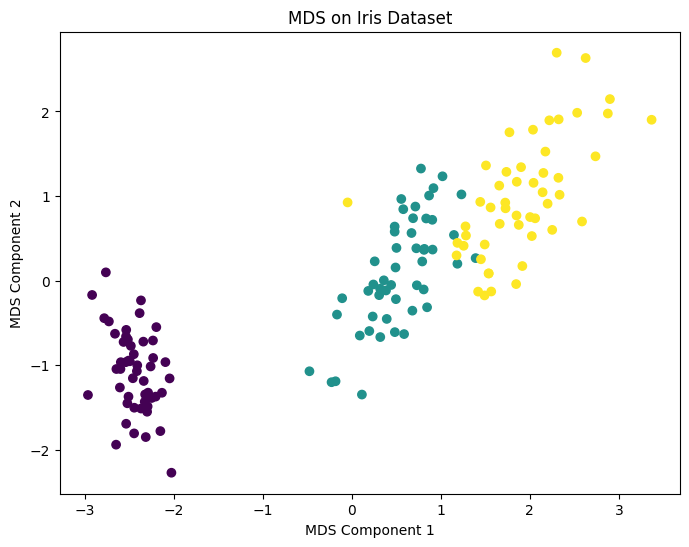

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


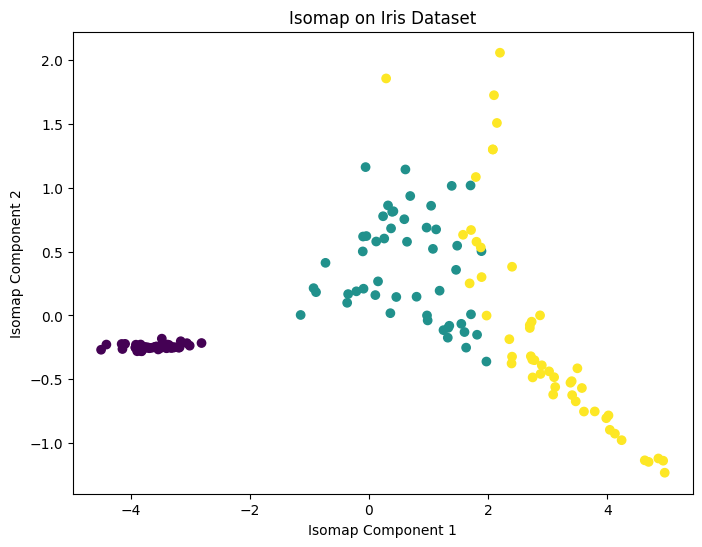

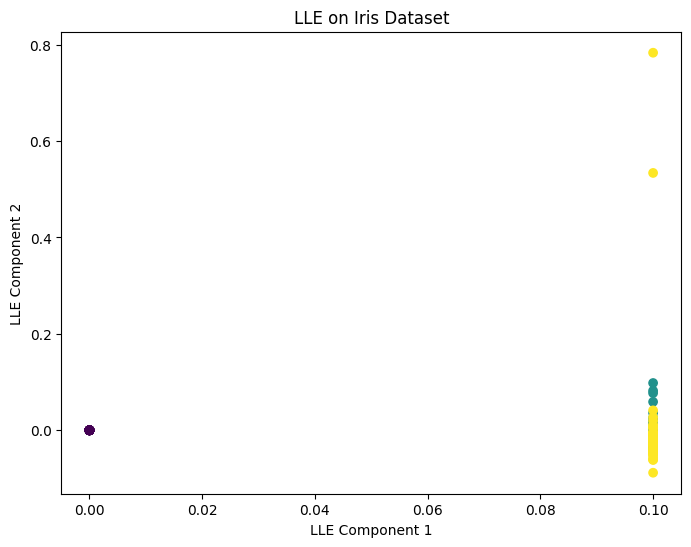

In [ ]:
# Applying Multidimensional Scaling (MDS)
mds = MDS(n_components=2)
X_mds = mds.fit_transform(X_iris)

# Plotting MDS results
plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_iris)
plt.title('MDS on Iris Dataset')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.show()

# Applying Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_iris)

# Plotting Isomap results
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_iris)
plt.title('Isomap on Iris Dataset')
plt.xlabel('Isomap Component 1')
plt.ylabel('Isomap Component 2')
plt.show()

# Applying Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X_iris)

# Plotting LLE results
plt.figure(figsize=(8, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_iris)
plt.title('LLE on Iris Dataset')
plt.xlabel('LLE Component 1')
plt.ylabel('LLE Component 2')
plt.show()


The plots for Multidimensional Scaling (MDS), Isomap, and Locally Linear Embedding (LLE) on the Iris dataset have been generated:

**MDS Plot:** This plot shows the Iris dataset reduced to two dimensions using MDS. MDS tries to preserve the distances between the points, which can help in visualizing the similarity between data points.
**Performance on Iris Dataset:** MDS aims to preserve the distance between data points in lower-dimensional space. It performed reasonably well with the Iris dataset, though it might not have been as effective as PCA in distinguishing between Versicolor and Virginica.

**Isomap Plot:** The Isomap plot visualizes the data in two dimensions, preserving the geodesic distances between points. Isomap is particularly useful for unfolding a manifold. A warning about the number of connected components was issued, suggesting a potential need to adjust the number of neighbors.
**Performance on Iris Dataset:** Isomap, which is designed to preserve the geodesic distances and is good for non-linear dimensionality reduction, provided meaningful insights into the dataset. However, for the relatively simple structure of the Iris dataset, it did not significantly outperform PCA or SVD.

**LLE Plot:** This plot demonstrates the results of applying LLE, which seeks to preserve local neighborhoods and can uncover non-linear structure in the data.
**Performance on Iris Dataset:** LLE, which focuses on preserving local neighborhood structures, had a performance somewhat similar to Isomap. While it captured some of the non-linear relationships, its advantage over PCA or SVD was not very pronounced in this particular dataset.

Each of these techniques offers a different perspective on the dataset. MDS focuses on preserving distances, Isomap on preserving geodesic distances (useful for manifold learning), and LLE on preserving local neighborhoods.

## t-SNE (t-Distributed Stochastic Neighbor Embedding)
t-SNE is a tool to visualize high-dimensional data by reducing it to a low-dimensional space.

**t-SNE:** The **perplexity** and **learning_rate** are key. Perplexity can be thought of as the number of effective nearest neighbors, and it has a large impact on the resulting embeddings. The learning rate controls the rate of convergence.

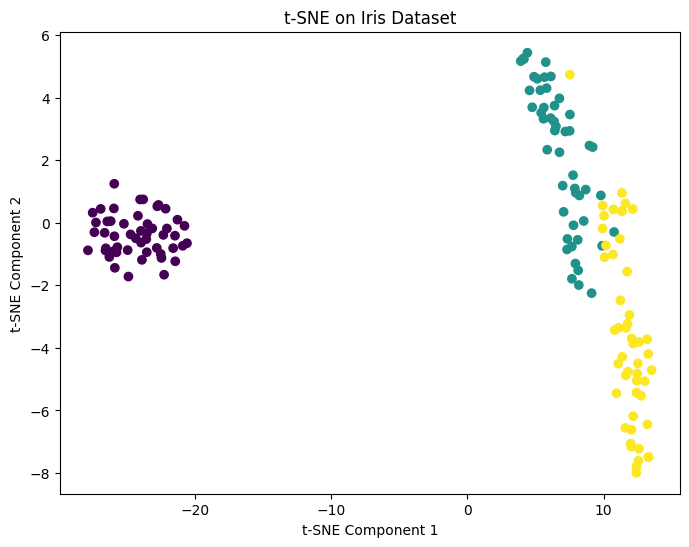

In [ ]:
# Applying t-SNE
tsne = TSNE(n_components=2, random_state=0)
X_tsne = tsne.fit_transform(X_iris)

# Plotting t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_iris)
plt.title('t-SNE on Iris Dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


## t-SNE Hyperparameters

t-SNE has hyperparameters like perplexity and learning_rate. Changing these values can lead to different embeddings.

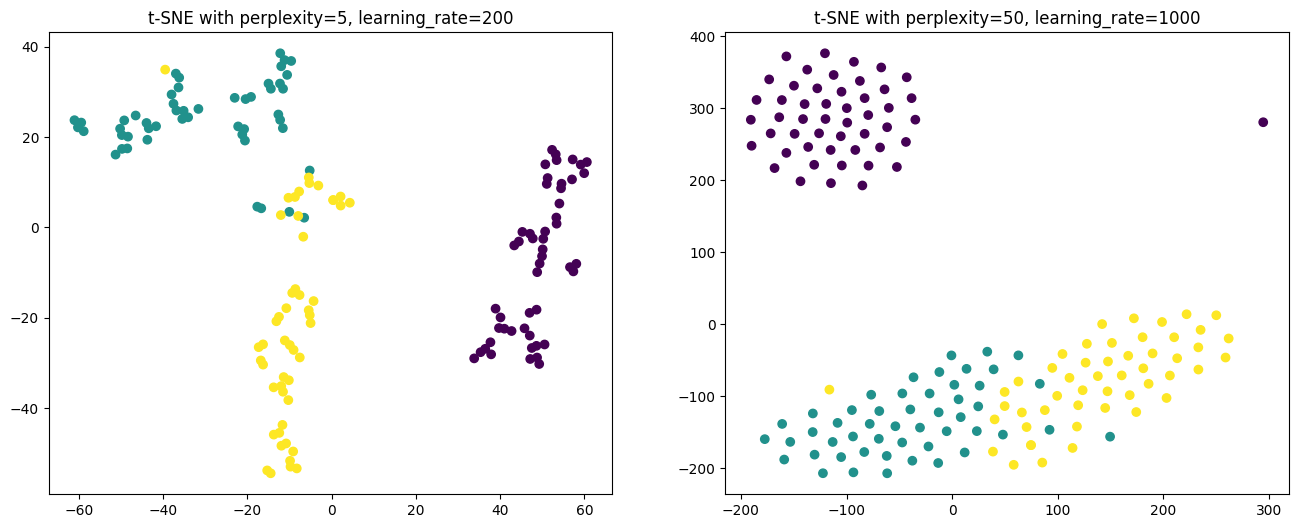

In [ ]:
# Exploring different hyperparameters for t-SNE
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hyperparameters set 1
tsne_set1 = TSNE(n_components=2, perplexity=5, learning_rate=200).fit_transform(X_iris)
axes[0].scatter(tsne_set1[:, 0], tsne_set1[:, 1], c=y_iris)
axes[0].set_title('t-SNE with perplexity=5, learning_rate=200')

# Hyperparameters set 2
tsne_set2 = TSNE(n_components=2, perplexity=50, learning_rate=1000).fit_transform(X_iris)
axes[1].scatter(tsne_set2[:, 0], tsne_set2[:, 1], c=y_iris)
axes[1].set_title('t-SNE with perplexity=50, learning_rate=1000')

plt.show()


## UMAP (Uniform Manifold Approximation and Projection)
UMAP is a novel manifold learning technique for dimension reduction. It is particularly good at preserving both local and global structure in the data.

**UMAP:** The **n_neighbors** and **min_dist** parameters are crucial. n_neighbors controls the balance between local and global structure in the data, while min_dist controls how tightly UMAP is allowed to pack points together. Different settings can lead to distinct visualizations and interpretations.

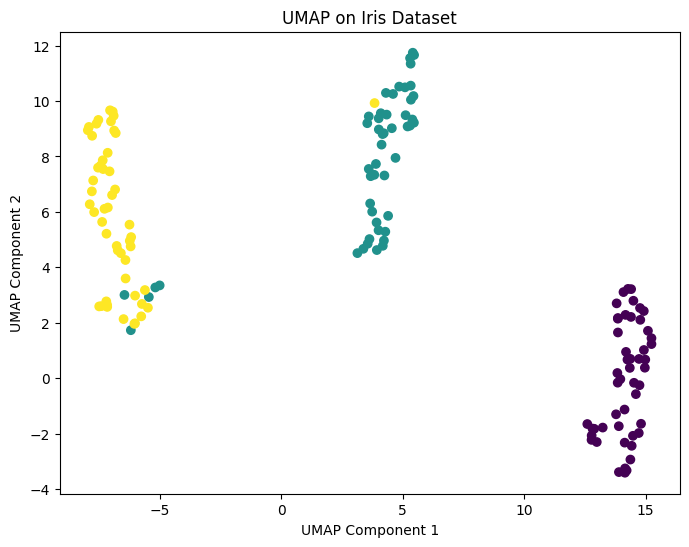

In [ ]:
# Applying UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2)
X_umap = umap_model.fit_transform(X_iris)

# Plotting UMAP results
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_iris)
plt.title('UMAP on Iris Dataset')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()

## UMAP Hyperparameters
UMAP has several key hyperparameters such as n_neighbors and min_dist that can drastically change the results.

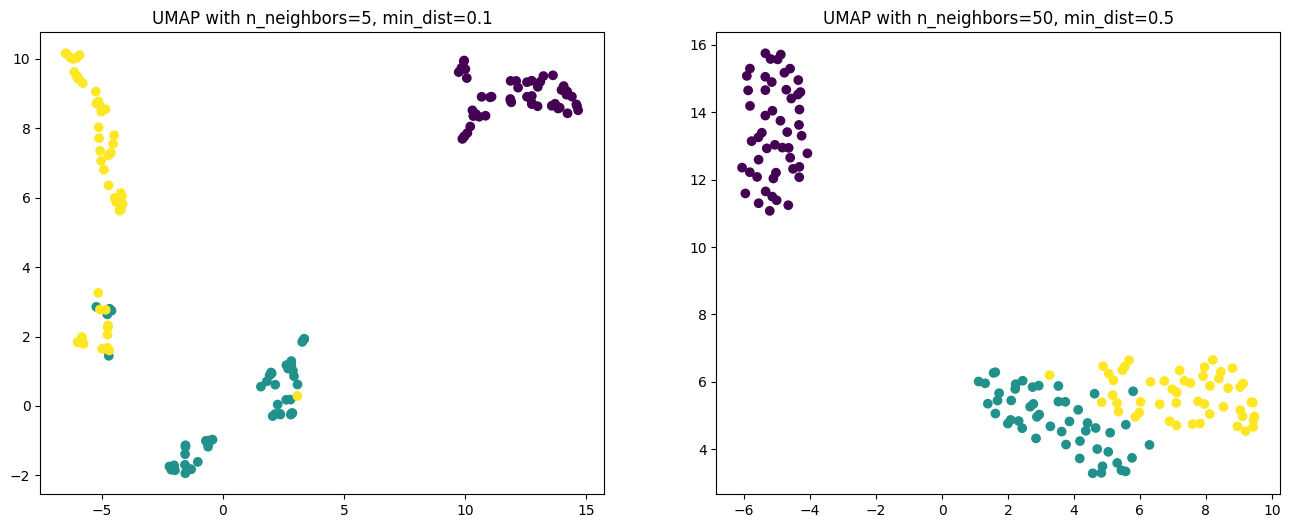

In [ ]:
# Exploring different hyperparameters for UMAP
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Hyperparameters set 1
umap_set1 = umap.UMAP(n_neighbors=5, min_dist=0.1, n_components=2).fit_transform(X_iris)
axes[0].scatter(umap_set1[:, 0], umap_set1[:, 1], c=y_iris)
axes[0].set_title('UMAP with n_neighbors=5, min_dist=0.1')

# Hyperparameters set 2
umap_set2 = umap.UMAP(n_neighbors=50, min_dist=0.5, n_components=2).fit_transform(X_iris)
axes[1].scatter(umap_set2[:, 0], umap_set2[:, 1], c=y_iris)
axes[1].set_title('UMAP with n_neighbors=50, min_dist=0.5')

plt.show()


## General Observations

- The Iris dataset, being relatively simple and with some degree of linear separability, was well-handled by linear techniques like PCA and SVD. These techniques provided clear separations between at least one of the species (Setosa) and partially between the other two.

- The more complex, non-linear techniques like MDS, Isomap, and LLE didn't show a significant advantage over PCA and SVD for this dataset. This is likely due to the fact that the Iris dataset doesn't have very complex non-linear structures, which these methods are particularly good at unraveling.

In conclusion, for the Iris dataset, linear dimensionality reduction techniques like PCA and SVD performed quite effectively, making them suitable choices. The non-linear techniques, while useful in more complex scenarios, did not demonstrate a significant advantage in this particular case.